# Table of contents



>[Importing](#scrollTo=40519a38)

>> **Overview**: Import necessary libraries

>[Data Outline and Preprocessing](#scrollTo=f77bc5a8)

>> **Overview**: Reading data and preprocessing

>[Visualization](#scrollTo=afbbc3a6)

>> **Overview**: Visualize to find out some insights

>[Analysis - "Relationship between sleep duration and body mass index depends on age"](#scrollTo=e1ac1fb2)

>> **Overview**: Analysis base on the visualize and other things



# Importing

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

Reading data from CSV file

In [7]:
df=pd.read_csv('data.csv')

# Data Outline and Preprocessing

**1) Data Outline**

Print the information of the data frame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


The code prints the unique values of the 'Occupation' column in the DataFrame 'df'.






In [9]:
print('Unique Values of Occupation are', df['Occupation'].unique())

Unique Values of Occupation are ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


The code prints the unique values of the 'BMI Category' column in the DataFrame 'df'.






In [10]:
print('Unique Values of BMI Category are', df['BMI Category'].unique())

Unique Values of BMI Category are ['Overweight' 'Normal' 'Obese' 'Normal Weight']


The code prints the unique values of the 'Sleep Disorder' column in the DataFrame 'df'.






In [11]:
print('Unique Values of Sleep Disorder are', df['Sleep Disorder'].unique())

Unique Values of Sleep Disorder are [nan 'Sleep Apnea' 'Insomnia']


**2) Preprocessing - Divide 'Blood Pressure' to highest and lowest**

Print the unique value of `Blood Pressure` column

In [12]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

The code concatenates the 'df' DataFrame with new columns created by splitting the 'Blood Pressure' column into two separate columns (systolic and diastolic) using the '/' separator. The original 'Blood Pressure' column is then dropped from the DataFrame 'df1'.






In [13]:
df1 = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop(
    'Blood Pressure', axis=1)

The code renames the columns '0' and '1' in the DataFrame 'df1' to 'BloodPressure_high' and 'BloodPressure_low', respectively, providing more descriptive column names for the systolic and diastolic blood pressure values.






In [14]:
df1=df1.rename(columns={0: 'BloodPressure_high', 1: 'BloodPressure_low'})

Change value type of `BloodPressure_high` and `BloodPressure_low` columns to float

In [15]:
df1['BloodPressure_high'] = df1['BloodPressure_high'].astype(float)
df1['BloodPressure_low'] = df1['BloodPressure_low'].astype(float)

In [16]:
df1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_high,BloodPressure_low
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


# Visualization

**1) Correlation Heatmap**

The code generates a heatmap using the correlation matrix of the DataFrame 'df1', excluding the 'Person ID' column, to visualize the pairwise correlations between the remaining numerical variables. The correlation values are displayed in the heatmap with one decimal place as annotations.






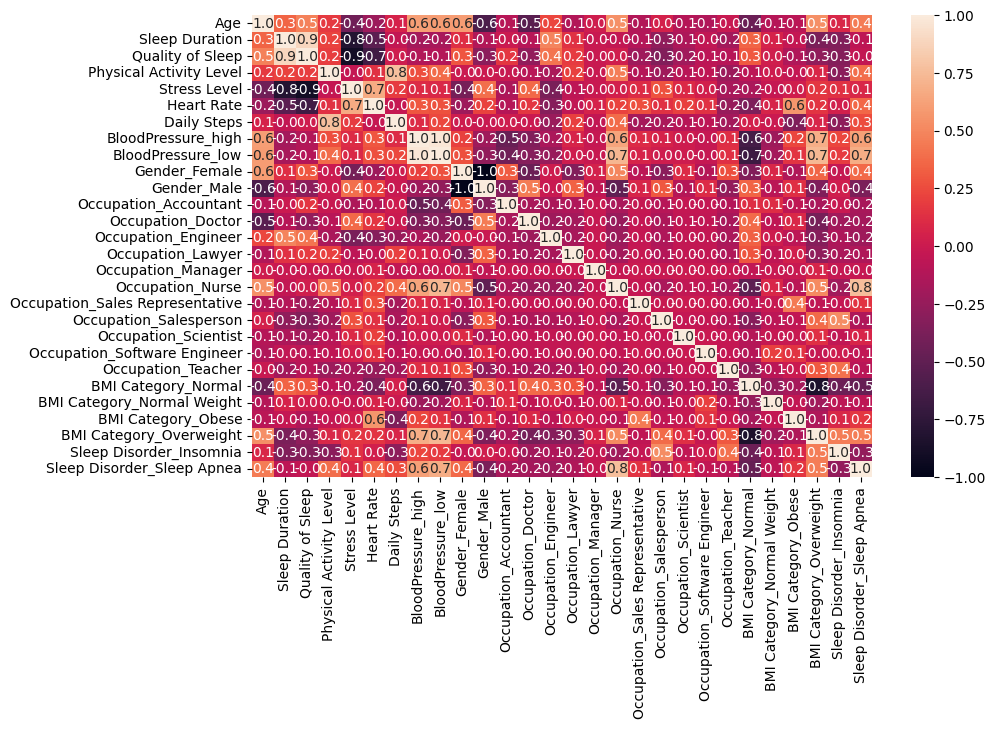

In [18]:
plt.figure(figsize=(10, 6))

# Assuming 'Person ID' is a non-numeric column that you want to drop
numeric_df = df1.drop('Person ID', axis=1)

# Convert categorical variables to numeric using one-hot encoding
numeric_df_encoded = pd.get_dummies(numeric_df)

# Calculate the correlation matrix
correlation_matrix = numeric_df_encoded.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt="1.1f")

plt.show()


**2) Pairplot**

The code generates a pair plot using the DataFrame 'df1' excluding the 'Person ID' column, where each variable is plotted against every other variable. The hue parameter is set to 'Sleep Disorder', resulting in different colors representing different sleep disorders in the plot.






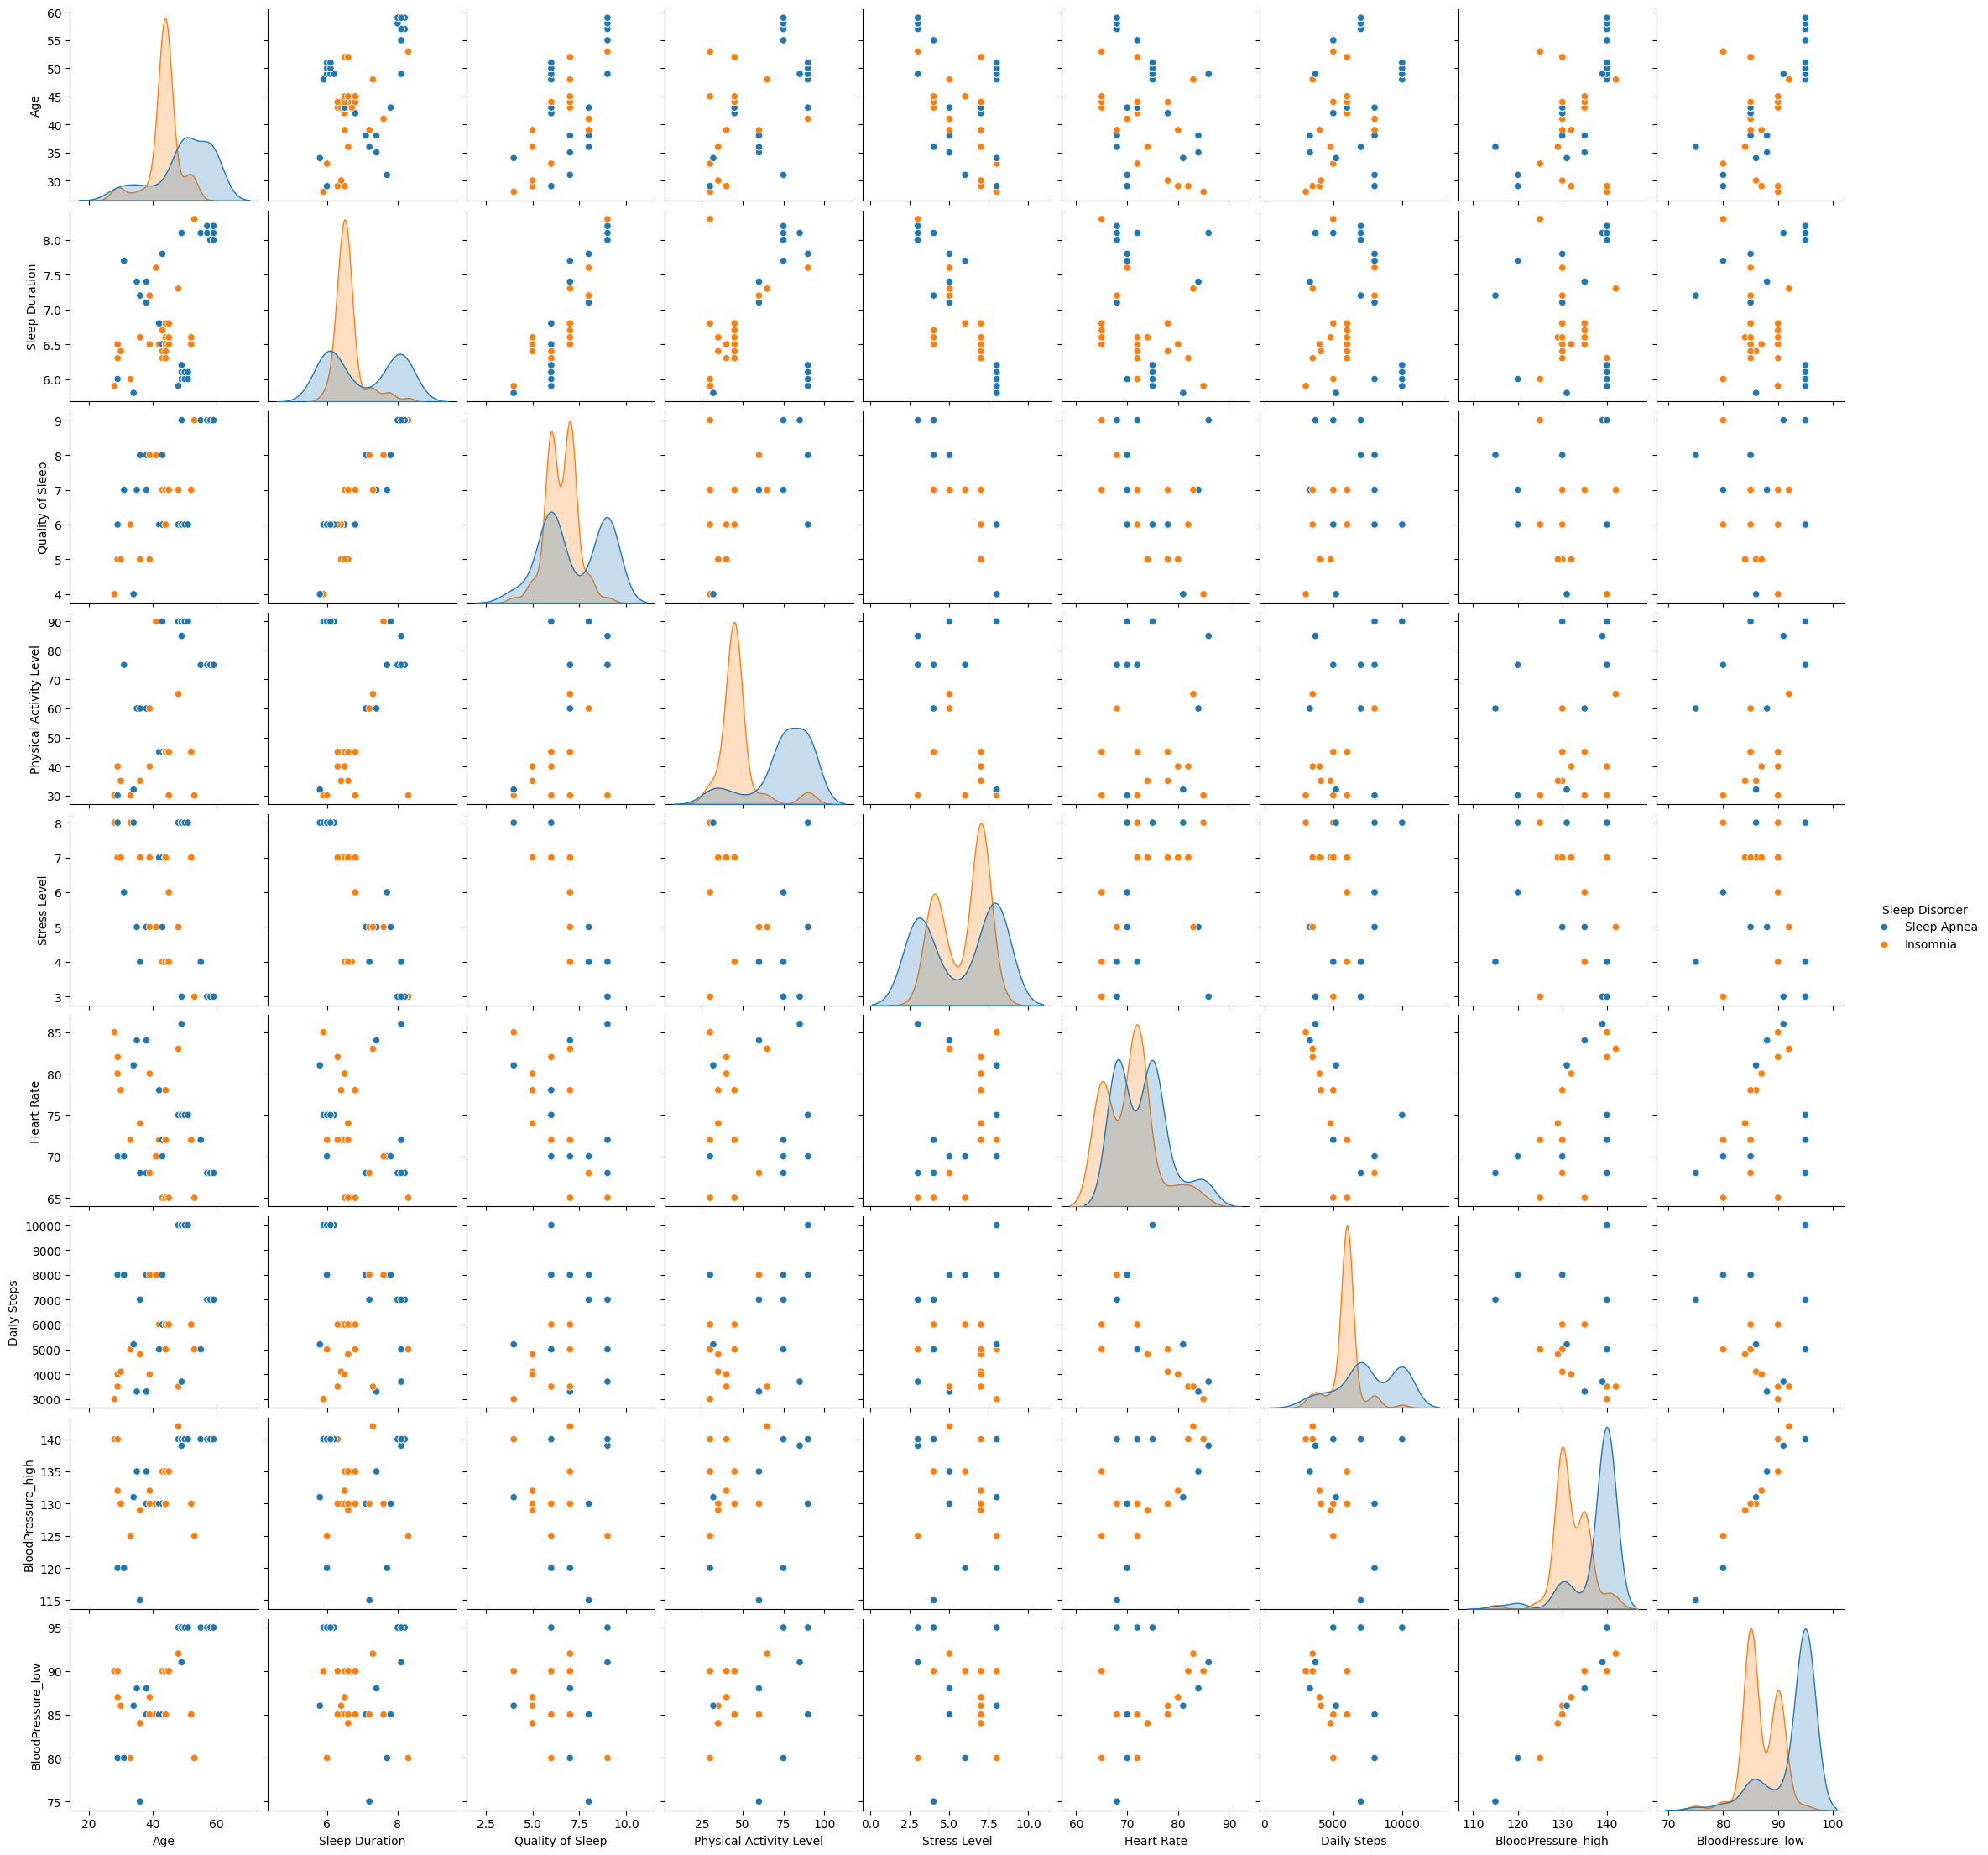

In [19]:
sns.pairplot(df1.drop('Person ID',axis=1),hue='Sleep Disorder');

In [20]:
num_col=['Age','Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'Heart Rate', 'Daily Steps',
       'BloodPressure_high', 'BloodPressure_low']

In [21]:
cat_col=['Gender','Occupation','BMI Category','Sleep Disorder']

**3) Histplot by Sleep Disorder**

The code creates a 3x3 grid of subplots and plots histograms for each numerical column in the DataFrame 'df1'. The histograms are colored according to the 'Sleep Disorder' category, and legends are added to indicate the different sleep disorders present in the data.






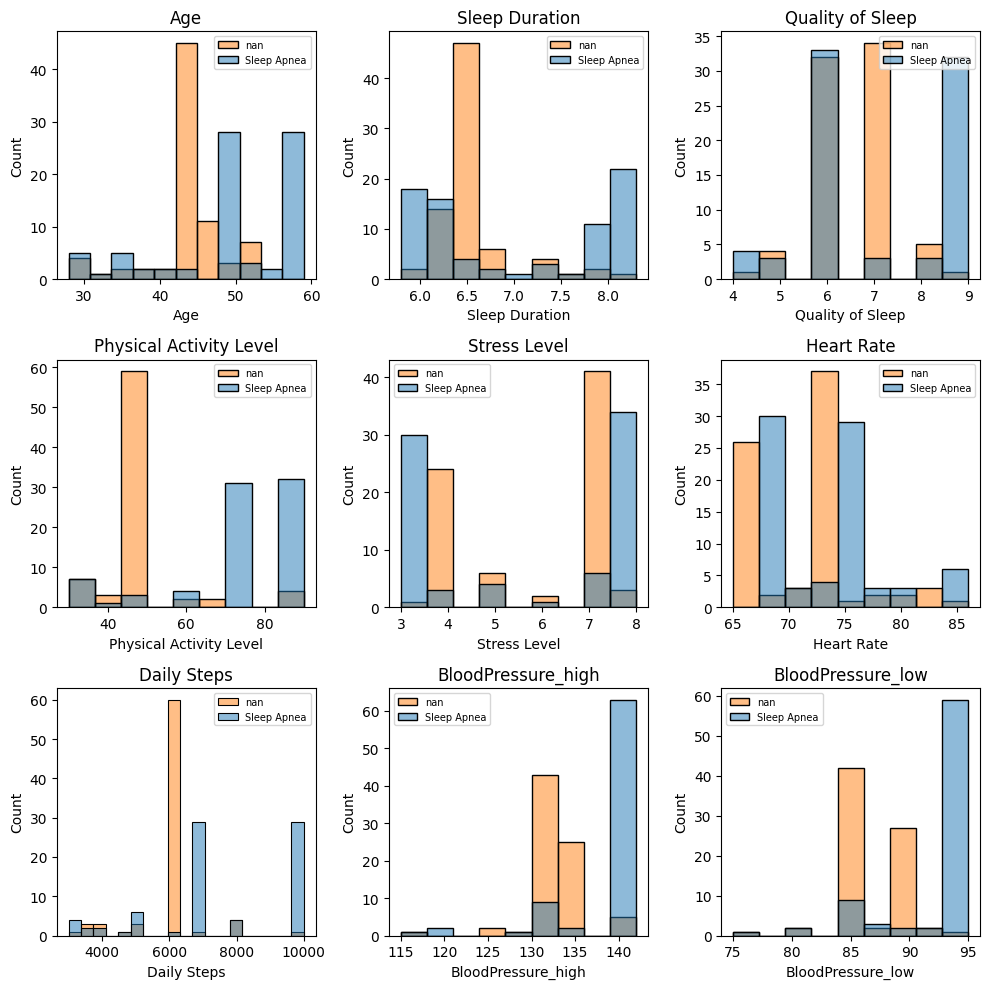

In [22]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.title(num_col[i])
    sns.histplot(data=df1,x=df1[num_col[i]],hue='Sleep Disorder')
    plt.legend(fontsize=7,labels=df['Sleep Disorder'].unique())
plt.tight_layout()
plt.show()

**4) Histplot by BMI Category**

The code creates a 3x3 grid of subplots and plots histograms for each numerical column in the DataFrame 'df1'. The histograms are colored according to the 'BMI Category' and legends are added to indicate the different BMI categories present in the data.






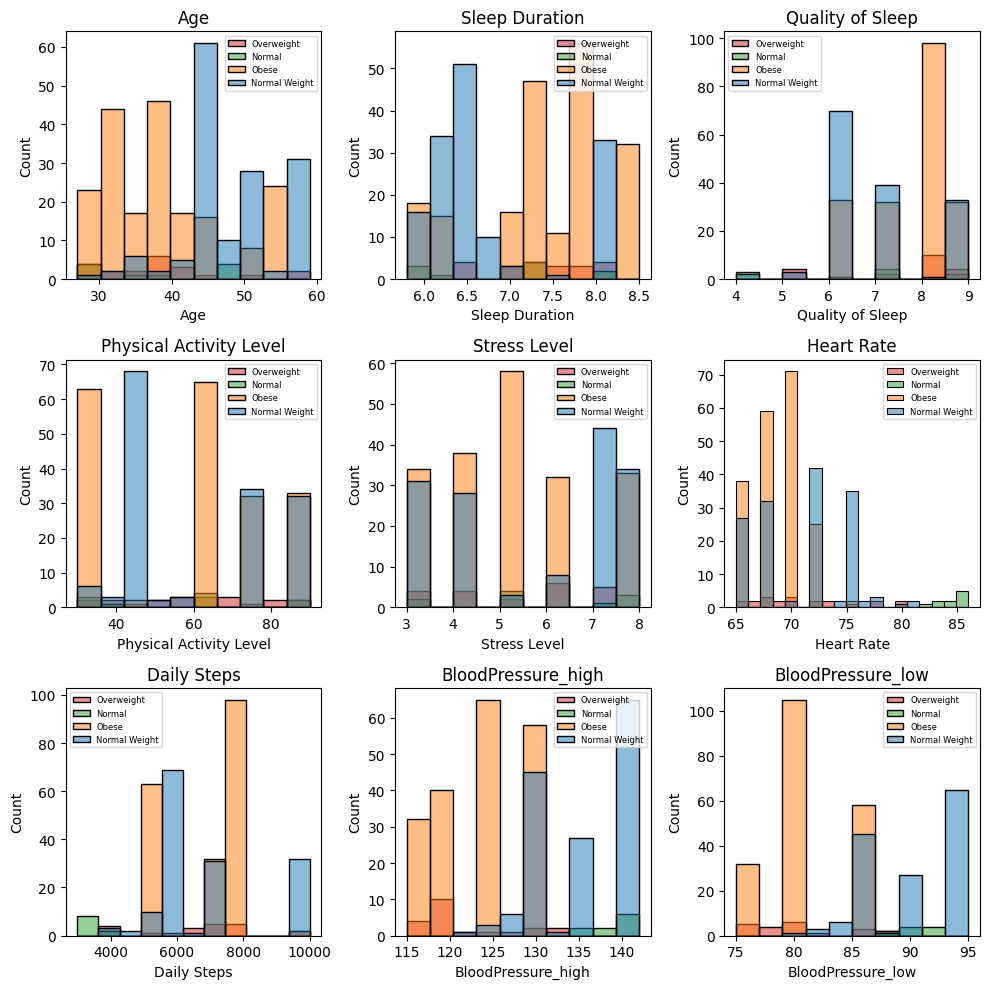

In [23]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.title(num_col[i])
    sns.histplot(data=df1,x=df1[num_col[i]],hue='BMI Category')
    plt.legend(labels=df['BMI Category'].unique(),fontsize=6)
plt.tight_layout()
plt.show()

**5) Boxplot by Gender**

The code creates a 3x3 grid of subplots and plots boxplots for each numerical column in the DataFrame 'df1'. The boxplots compare the distribution of the numerical variable across different genders, with each subplot representing a different numerical column.






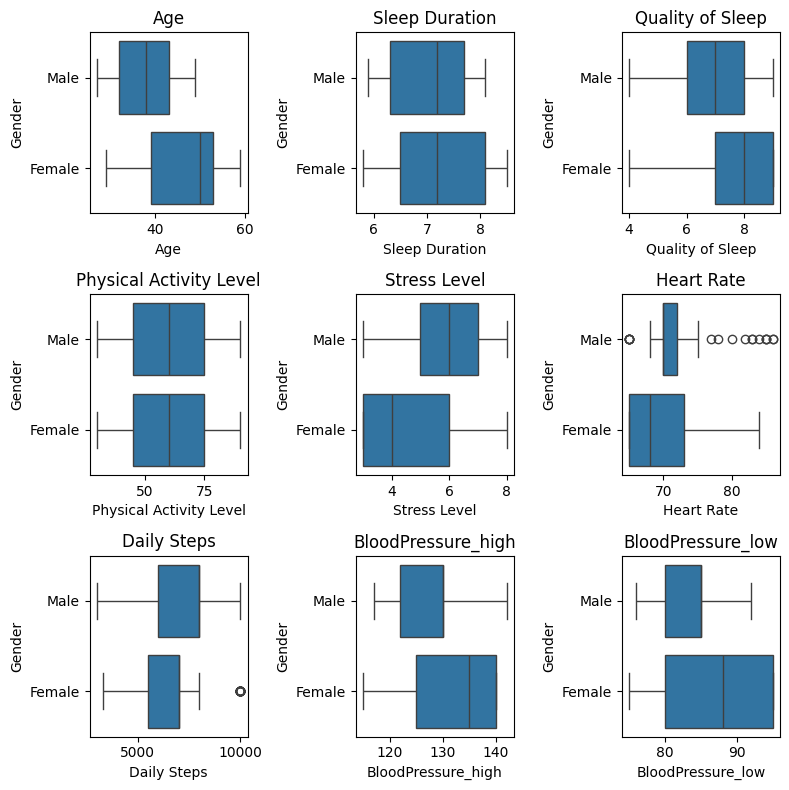

In [24]:
fig = plt.figure(figsize=(8,8))

for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.title(num_col[i])
    sns.boxplot(data=df1,y=df1['Gender'],x=df1[num_col[i]])
plt.tight_layout()
plt.show()

**6) Boxplot by Occupation**

The code creates a 3x3 grid of subplots and plots boxplots for each numerical column in the DataFrame 'df1'. The boxplots compare the distribution of the numerical variable across different occupations, with each subplot representing a different numerical column.






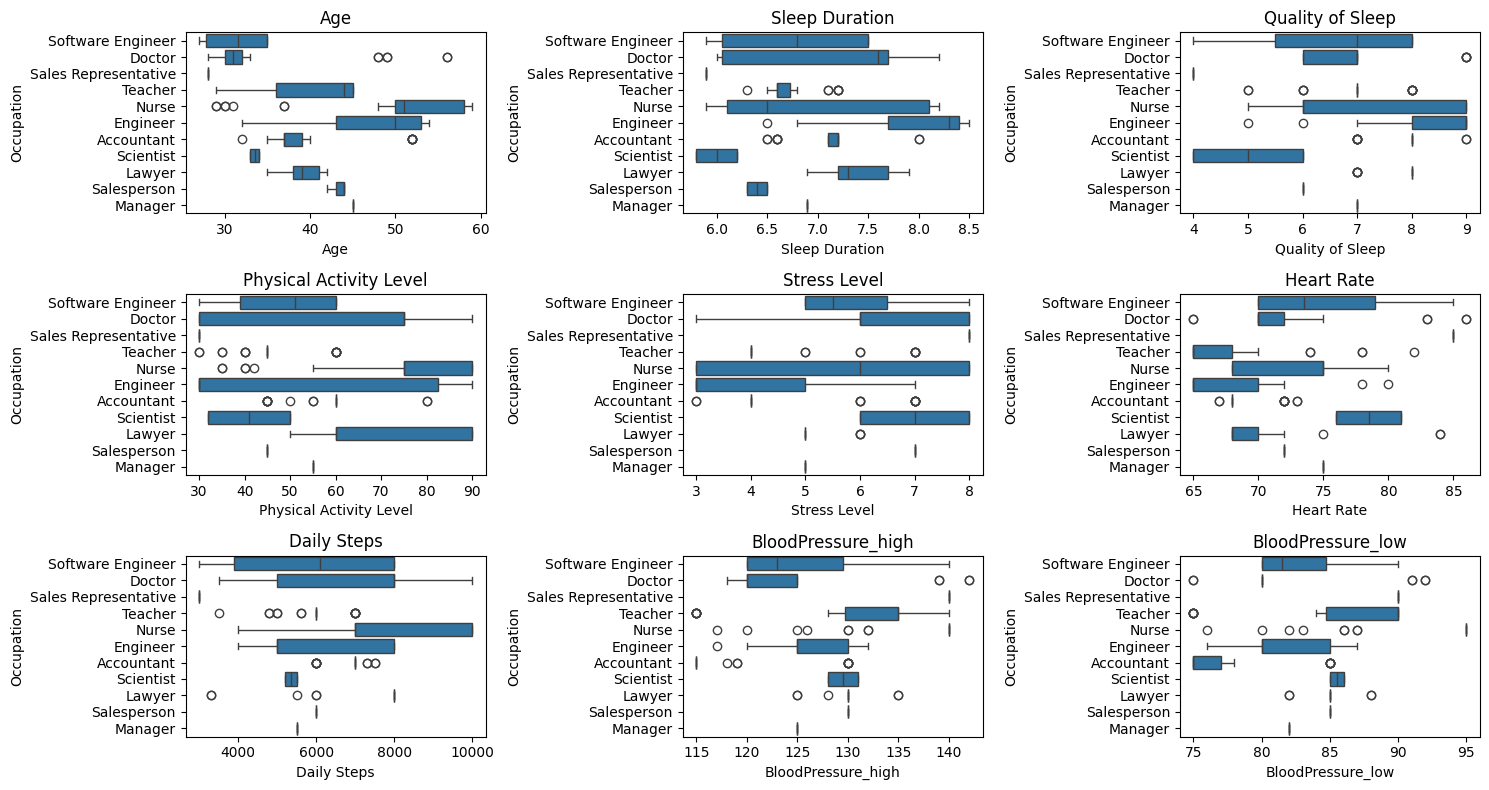

In [25]:
fig = plt.figure(figsize=(15,8))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.title(num_col[i])
    sns.boxplot(data=df1,y=df1['Occupation'],x=df1[num_col[i]])
plt.tight_layout()
plt.show()

**7) Boxplot by BMI Category**

The code creates a 3x3 grid of subplots and plots boxplots for each numerical column in the DataFrame 'df1'. The boxplots compare the distribution of the numerical variable across different BMI categories, with each subplot representing a different numerical column.






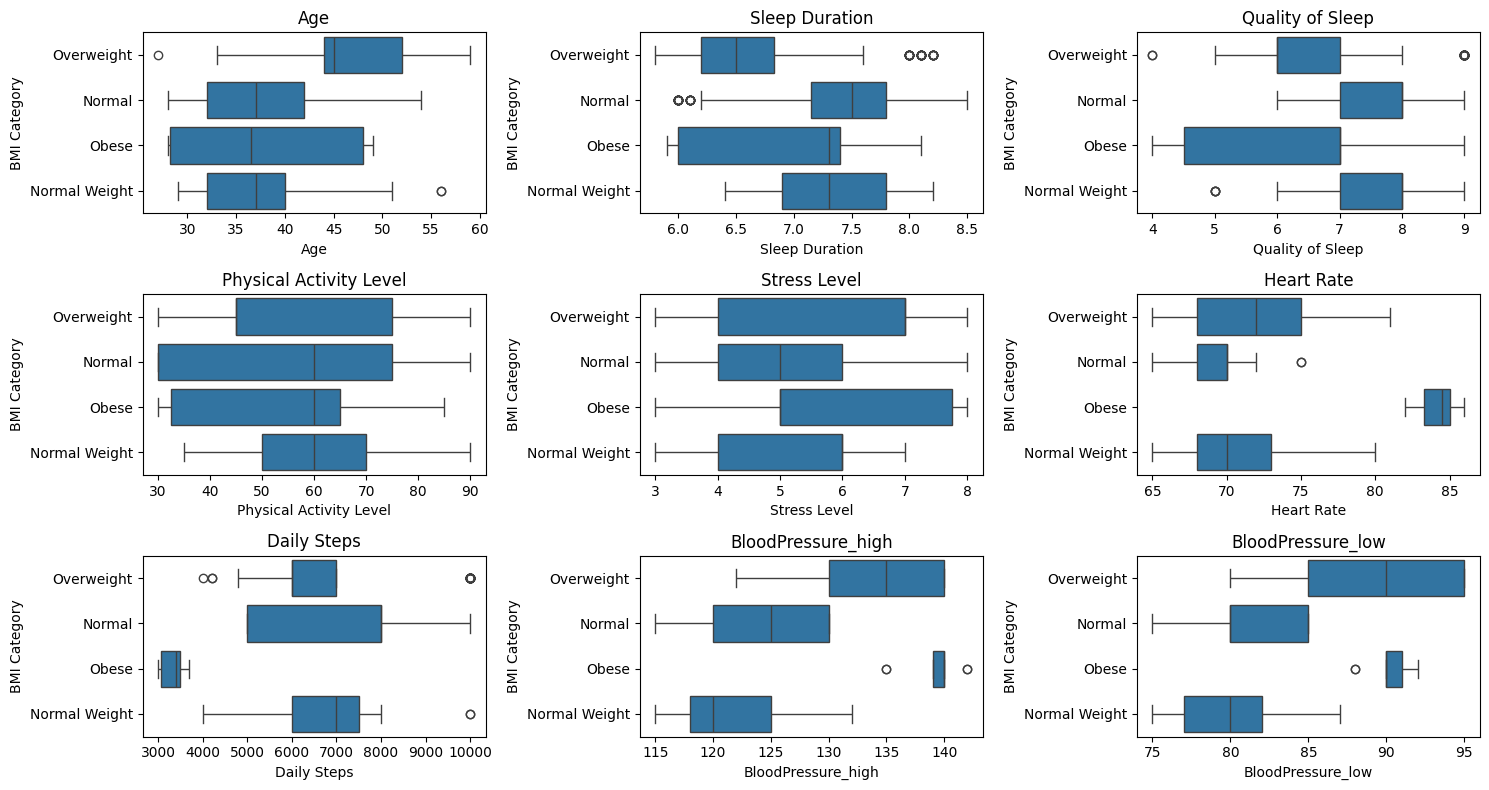

In [26]:
fig = plt.figure(figsize=(15,8))

for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.title(num_col[i])
    sns.boxplot(data=df1,y=df1['BMI Category'],x=df1[num_col[i]])
plt.tight_layout()
plt.show()

**8) Boxplot by Sleep Disorder**

The code creates a 3x3 grid of subplots and plots boxplots for each numerical column in the DataFrame 'df1'. The boxplots compare the distribution of the numerical variable across different sleep disorders, with each subplot representing a different numerical column.






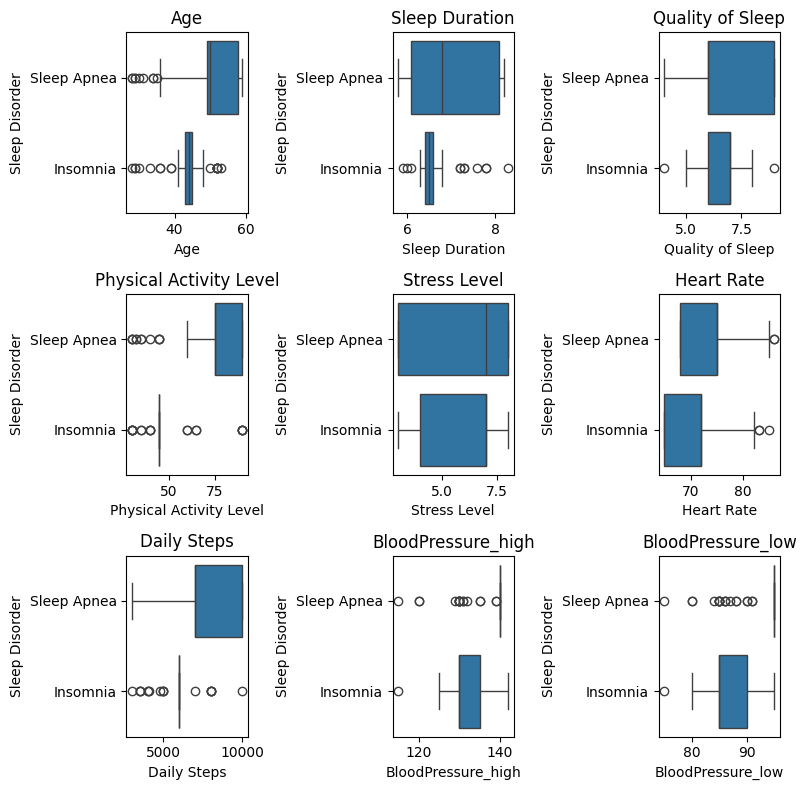

In [27]:
fig = plt.figure(figsize=(8,8))

for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.title(num_col[i])
    sns.boxplot(data=df1,y=df1['Sleep Disorder'],x=df1[num_col[i]])
plt.tight_layout()
plt.show()

# Analysis - "Relationship between sleep duration and body mass index depends on age"

**1) Scatterplot with Age, Sleep Duration and BMI Category**

The code creates a scatter plot of 'Age' versus 'Sleep Duration' from the DataFrame 'df1' with points colored based on the 'BMI Category'. It also sets the legend, tick labels, and rotates the x-axis labels. Additionally, it adds a legend, sets x and y axis limits, and overlays a red line on the plot.






No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


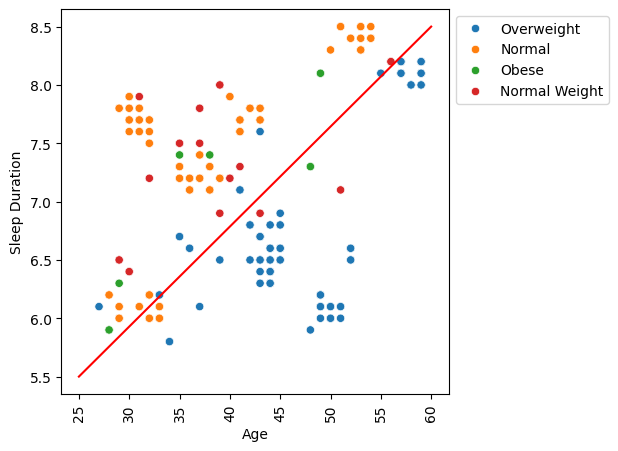

In [28]:
plt.figure(figsize=(5, 5))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df1['Age'],y=df1['Sleep Duration'],hue=df1['BMI Category'],data=df1,sizes=(50,500))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
x_lim = [25,60]
y_lim = [5.5,8.5]
plt.plot(x_lim, y_lim,color="red");

**2) Convert BMI Category to Ordinal- Normal:0, Normal Weight:1, Over Weight:2, Obese:3**

In [29]:
df1=df1.replace({'BMI Category': {'Normal': 0,'Normal Weight':1,'Overweight':2,'Obese':3}})

The code creates a scatter plot of 'Age' versus 'BMI Category' from the DataFrame 'df1' with points colored based on the 'Sleep Duration'. It also sets the legend, tick labels, and rotates the x-axis labels. Additionally, it adds a legend, sets x and y axis limits, and overlays a red line on the plot.






No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


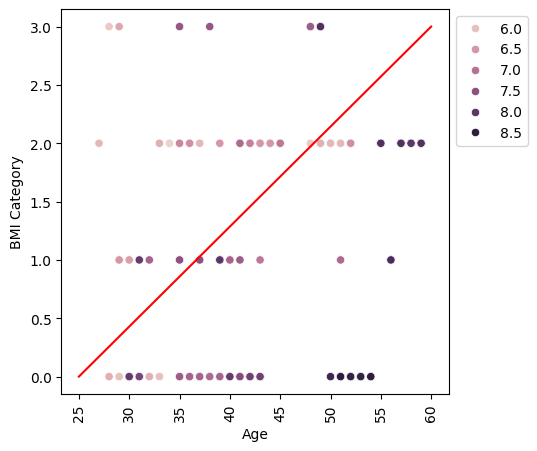

In [30]:
plt.figure(figsize=(5, 5))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df1['Age'],y=df1['BMI Category'],hue=df1['Sleep Duration'],data=df1,sizes=(50,500))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
x_lim = [25,60]
y_lim = [0,3]
plt.plot(x_lim, y_lim,color="red");

**3) Create age group 20s, 30s,40s and 50s**

In [31]:
df1['Age'].describe()

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

The code creates a new column 'Age_bin' in the DataFrame 'df1' which categorizes the 'Age' values into bins based on specified ranges. The labels for the bins are assigned as integers starting from 0.







In [32]:
df1['Age_bin'] = pd.cut(df1['Age'],[0, 30, 40, 50,60], labels=False)

In [33]:
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_high,BloodPressure_low,Age_bin
0,1,Male,27,Software Engineer,6.1,6,42,6,2,77,4200,NaN,126.0,83.0,0
1,2,Male,28,Doctor,6.2,6,60,8,0,75,10000,NaN,125.0,80.0,0
2,3,Male,28,Doctor,6.2,6,60,8,0,75,10000,NaN,125.0,80.0,0
3,4,Male,28,Sales Representative,5.9,4,30,8,3,85,3000,Sleep Apnea,140.0,90.0,0
4,5,Male,28,Sales Representative,5.9,4,30,8,3,85,3000,Sleep Apnea,140.0,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,2,68,7000,Sleep Apnea,140.0,95.0,3
370,371,Female,59,Nurse,8.0,9,75,3,2,68,7000,Sleep Apnea,140.0,95.0,3
371,372,Female,59,Nurse,8.1,9,75,3,2,68,7000,Sleep Apnea,140.0,95.0,3
372,373,Female,59,Nurse,8.1,9,75,3,2,68,7000,Sleep Apnea,140.0,95.0,3


**4) BMI Category by Age_bin**

The code groups the DataFrame 'df1' by the 'Age_bin' column, calculates the mean of the 'BMI Category' for each group, and plots a line graph showing the trend of the mean BMI category across different age bins.






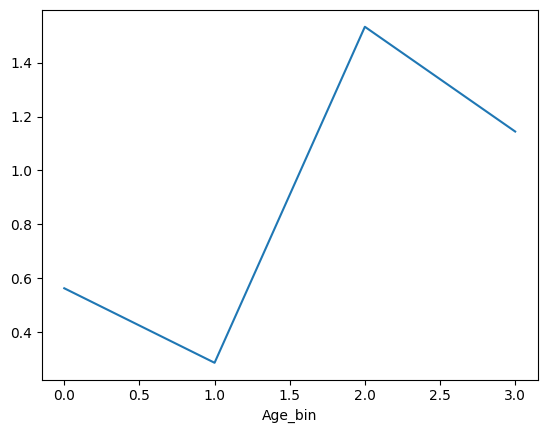

In [34]:
df1.groupby('Age_bin')['BMI Category'].mean().plot.line();

**5) Sleep Durarion by Age_bin**

The code groups the DataFrame 'df1' by the 'Age_bin' column, calculates the mean of the 'Sleep Duration' for each group, and plots a line graph showing the trend of the mean sleep duration across different age bins.






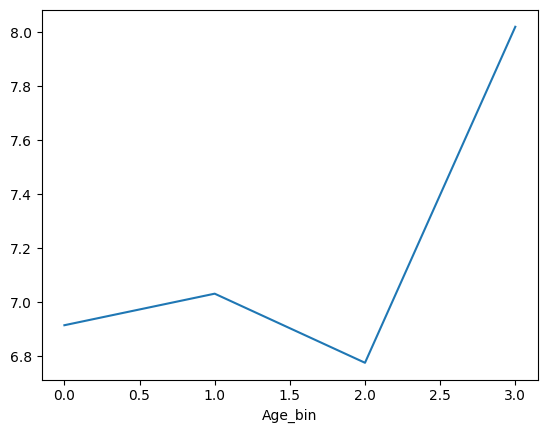

In [35]:
df1.groupby('Age_bin')['Sleep Duration'].mean().plot.line();

**6) BMI Category Boxplot by Age_bin**

The code creates a boxplot using the DataFrame 'df1', where the 'Age_bin' is plotted on the x-axis and the 'BMI Category' is plotted on the y-axis, visualizing the distribution and variability of BMI categories across different age bins.






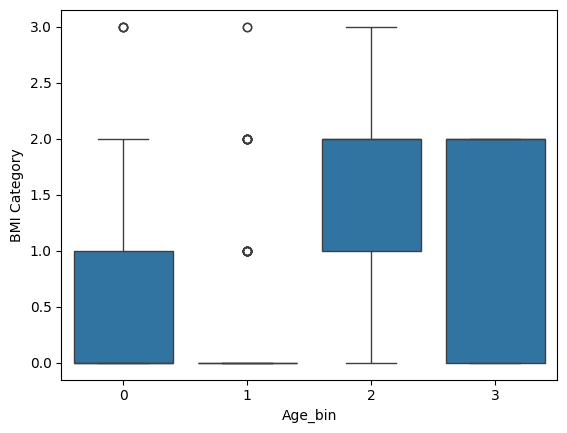

In [36]:
sns.boxplot(data=df1,x=df1['Age_bin'],y=df1['BMI Category']);

**7) Sleep Duration Boxplot by Age_bin**

The code creates a boxplot using the DataFrame 'df1', where the 'Age_bin' is plotted on the x-axis and the 'Sleep Duration' is plotted on the y-axis, visualizing the distribution and variability of sleep durations across different age bins.






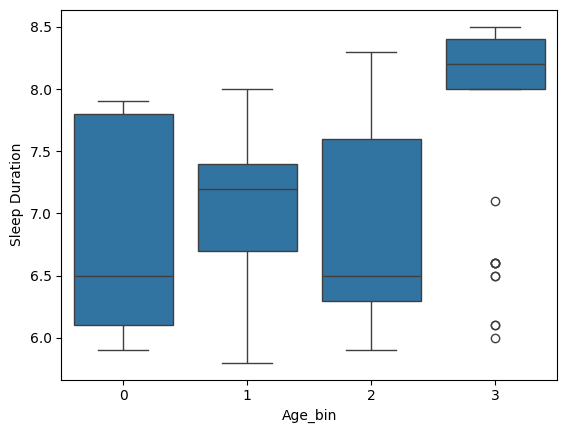

In [37]:
sns.boxplot(data=df1,x=df1['Age_bin'],y=df1['Sleep Duration']);

**8) Age_bin, BMI Category and Sleep Duration Boxplot by Occupation**

The code creates a boxplot using the DataFrame 'df1', where the 'Occupation' is plotted on the x-axis and the 'Age_bin' is plotted on the y-axis, showing the distribution and variability of age bins across different occupations. The x-axis labels are rotated by 45 degrees for better readability.






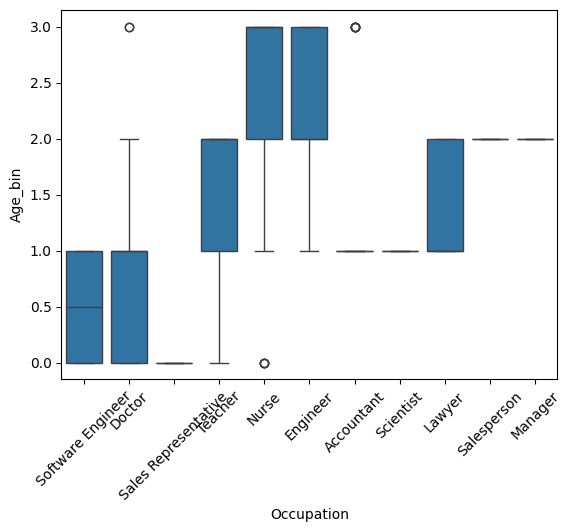

In [38]:
sns.boxplot(data=df1,x=df1['Occupation'],y=df1['Age_bin'])
plt.xticks(rotation=45);

The code creates a boxplot using the DataFrame 'df1', where the 'Occupation' is plotted on the x-axis and the 'BMI Category' is plotted on the y-axis, showing the distribution and variability of BMI categories across different occupations. The x-axis labels are rotated by 45 degrees for better readability.



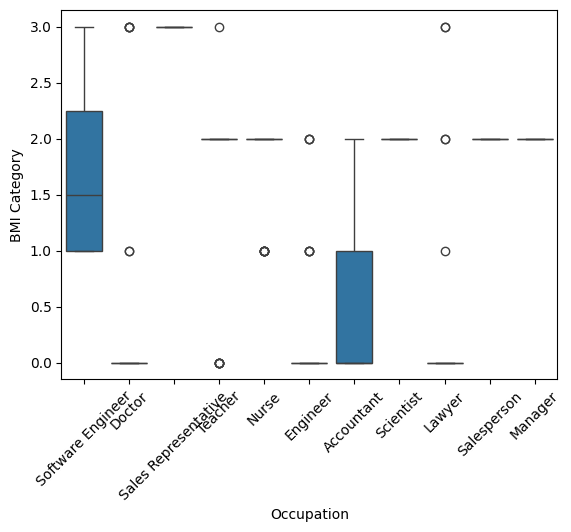

In [39]:
sns.boxplot(data=df1,x=df1['Occupation'],y=df1['BMI Category'])
plt.xticks(rotation=45);

The code creates a boxplot using the DataFrame 'df1', where the 'Occupation' is plotted on the x-axis and the 'Sleep Duration' is plotted on the y-axis, showing the distribution and variability of sleep durations across different occupations. The x-axis labels are rotated by 45 degrees for better readability.






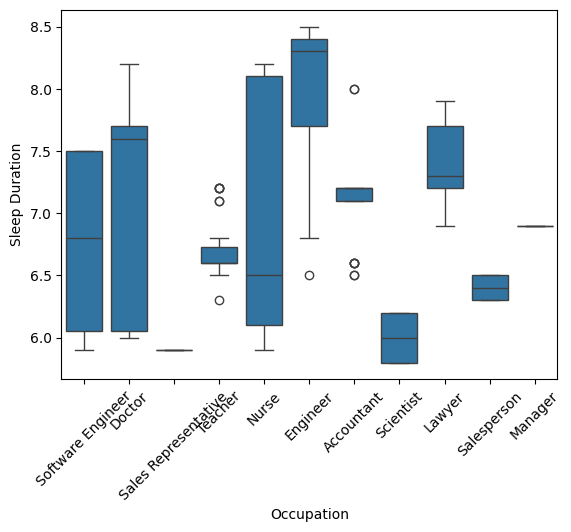

In [40]:
sns.boxplot(data=df1,x=df1['Occupation'],y=df1['Sleep Duration'])
plt.xticks(rotation=45);

**Theare are large gap in Age_bin by Occupation. It may means that "Relationship between sleep duration and body mass index depends on occupation, not age"**

**Thank you!**